[*********************100%%**********************]  5 of 5 completed


Annualized Volatility:
0.31836351313015604
Annualized Return:
0.2237945281453313
Sharpe Ratio:
0.5301943256177203


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

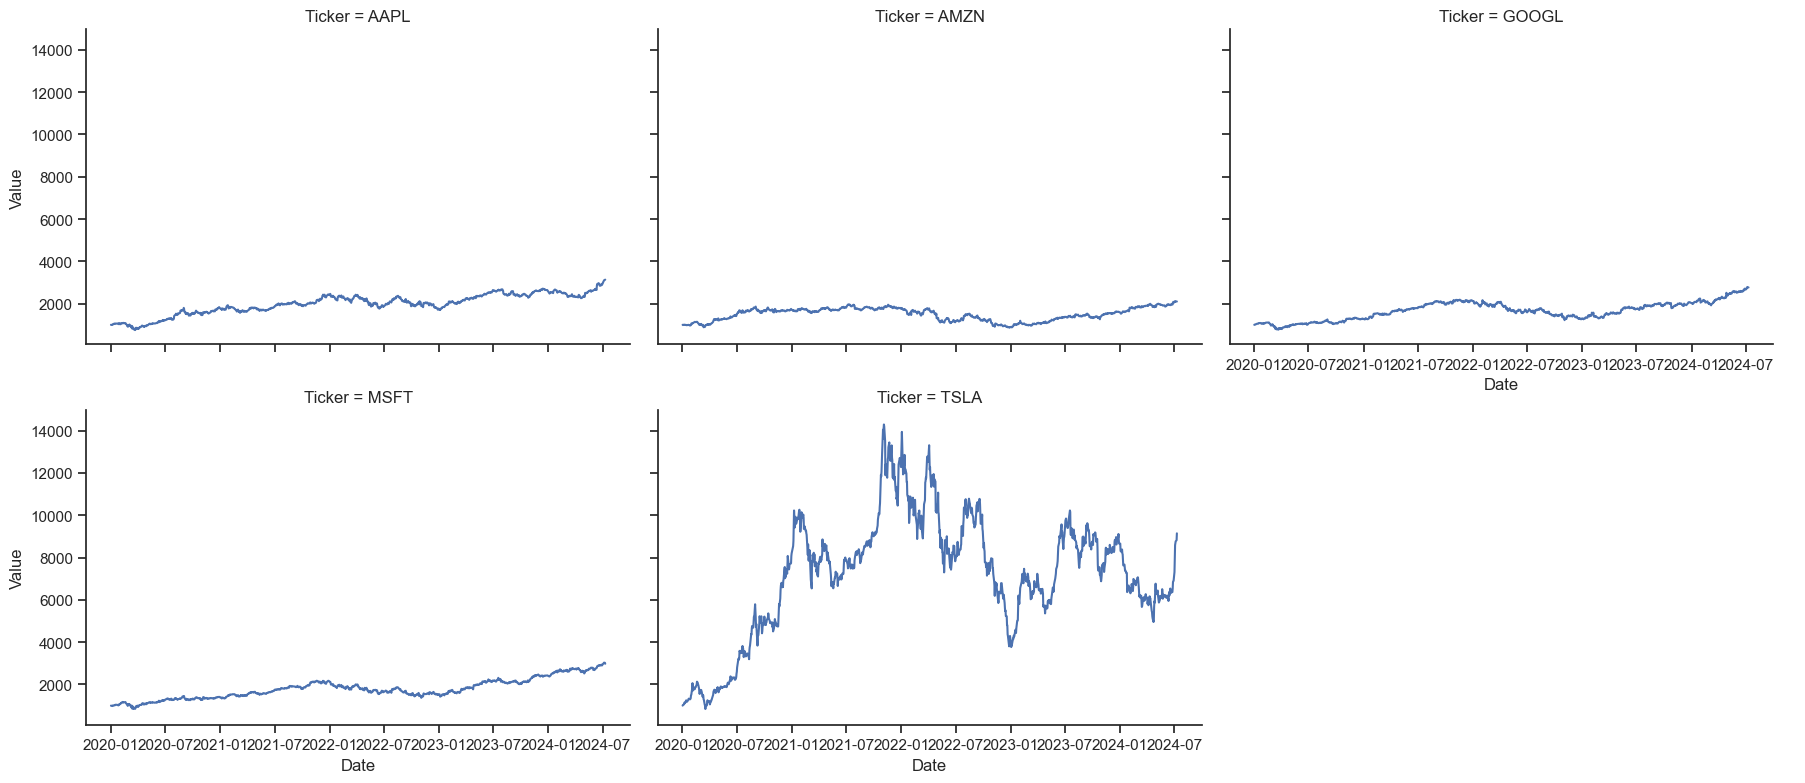

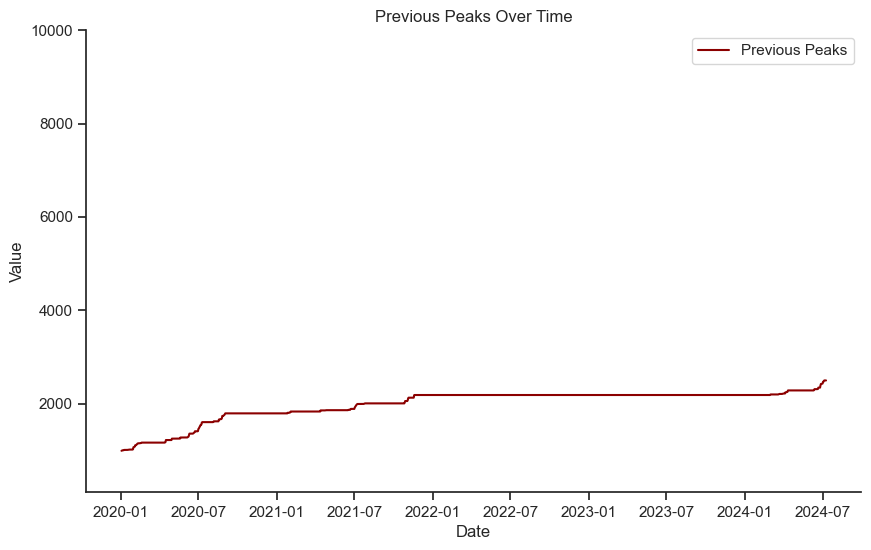

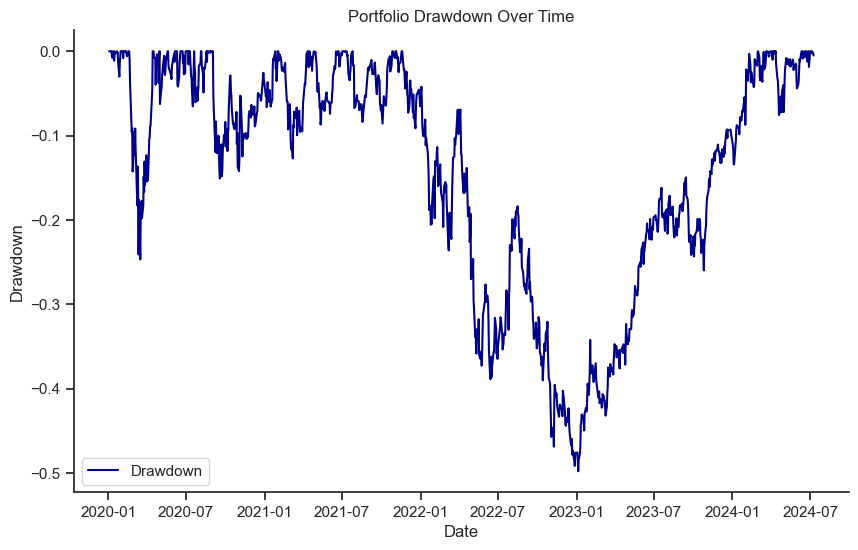

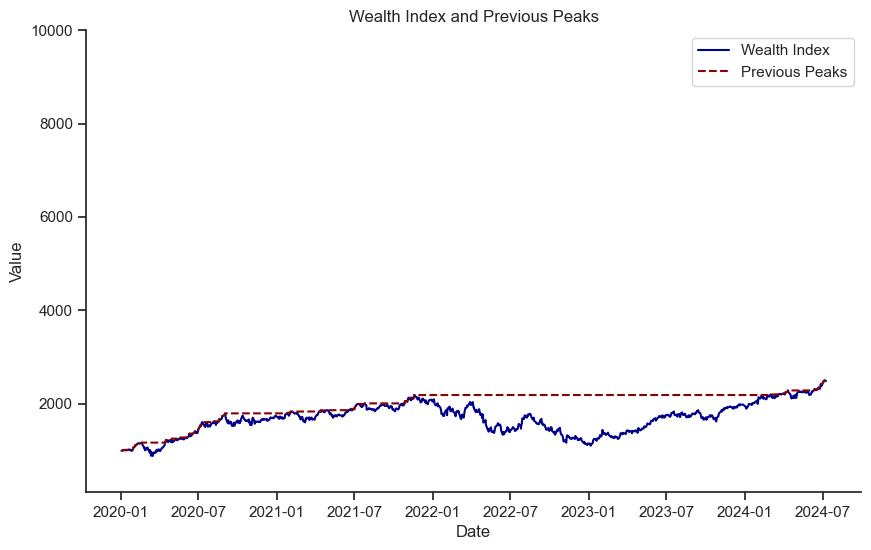

Max Drawdown:
-0.497636103753567


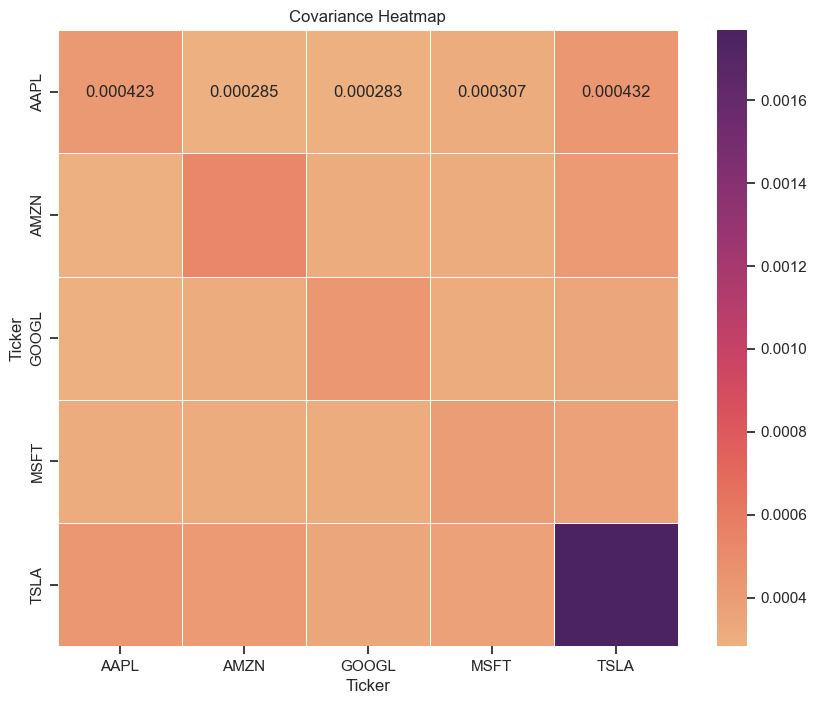

In [89]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Portfolio details
portfolio = pd.DataFrame({
    'Ticker': ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA'],
    'Shares': [10, 50, 5, 200, 15]
})

# Define a common start date for backtesting
start_date = '2020-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Fetch historical data
data = yf.download(portfolio['Ticker'].tolist(), start=start_date, end=end_date)['Adj Close']

# Normalize the data so that all series start at the same value (e.g., 1000)
normalized_data = (data / data.iloc[0]) * 1000

# Initialize a DataFrame for the portfolio value over time
portfolio_value = pd.DataFrame(index=data.index)

# Calculate the portfolio value over time
for i, row in portfolio.iterrows():
    ticker = row['Ticker']
    shares = row['Shares']
    
    # Calculate value of the position over time
    position_value = data[ticker] * shares
    portfolio_value[ticker] = position_value

# Sum the value of all positions to get the total portfolio value
portfolio_value['Total'] = portfolio_value.sum(axis=1)

# Replace infinite values with NaN in the portfolio_value DataFrame
portfolio_value.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate daily returns of the portfolio
portfolio_returns = portfolio_value['Total'].pct_change().dropna()

# Calculate annualized volatility
annualized_vol = portfolio_returns.std() * np.sqrt(252)

# Calculate annualized return
n_days = portfolio_returns.shape[0]
annualized_return = (portfolio_returns + 1).prod()**(252/n_days) - 1

# Set risk-free rate
riskfree_rate = 0.055

# Calculate Sharpe ratio
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return / annualized_vol

print("Annualized Volatility:")
print(annualized_vol)
print("Annualized Return:")
print(annualized_return)
print("Sharpe Ratio:")
print(sharpe_ratio)

# Calculate wealth index
wealth_index = 1000 * (1 + portfolio_returns).cumprod()

# Replace infinite values with NaN in wealth_index
wealth_index.replace([np.inf, -np.inf], np.nan, inplace=True)

# Seaborn theme and color palette settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Prepare data for Seaborn FacetGrid
normalized_data.reset_index(inplace=True)
normalized_data_long = normalized_data.melt(id_vars='Date', var_name='Ticker', value_name='Value')

# Create Seaborn FacetGrid plot
g = sns.FacetGrid(normalized_data_long, col="Ticker", col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'Date', 'Value', linewidth=1.5)
g.add_legend()

# Show the plot
plt.show()

# Calculate previous peaks
previous_peaks = wealth_index.cummax()

# Plot previous peaks with improved labels and extended y-axis limits
plt.figure(figsize=(10, 6))
plt.plot(previous_peaks, label='Previous Peaks', color='darkred', linewidth=1.5)
plt.title('Previous Peaks Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.ylim(100, 10000)
plt.legend()
plt.show()

# Calculate drawdown
drawdown = (wealth_index - previous_peaks) / previous_peaks

# Replace infinite values with NaN in drawdown
drawdown.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot drawdown with improved labels
plt.figure(figsize=(10, 6))
plt.plot(drawdown, label='Drawdown', color='darkblue', linewidth=1.5)
plt.title('Portfolio Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()

# Plot wealth index and previous peaks together with improved labels
plt.figure(figsize=(10, 6))
plt.plot(wealth_index, label='Wealth Index', color='darkblue', linewidth=1.5)
plt.plot(previous_peaks, label='Previous Peaks', linestyle='--', color='darkred', linewidth=1.5)
plt.title('Wealth Index and Previous Peaks')
plt.xlabel('Date')
plt.ylabel('Value')
plt.ylim(100, 10000)
plt.legend()
plt.show()

# Calculate max drawdown
max_drawdown = drawdown.min()
print("Max Drawdown:")
print(max_drawdown)

# Calculate the covariance matrix
cov_matrix = data.pct_change().dropna().cov()

# Plot the heatmap for covariances with formatted numbers
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap="flare", linewidths=.5, fmt=".6f")
plt.title('Covariance Heatmap')
plt.show()